In [1]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *
from combine_results import combine_results

c:\Users\florence.boettger\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet',
 'optimize_counterfactuals_initial',
 'optimize_counterfactuals_initial2',
 'optimize_counterfactuals_vandenhende',
 'optimize_counterfactuals_vandenhende2',
 'optimize_counterfactuals_vandenhende3',
 'optimize_counterfactuals_performance_vgg',
 'optimize_counterfactuals_performance_vgg_2',
 'optimize_counterfactuals_initial3',
 'optimize_counterfactuals_performance_vgg_final']

In [3]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_vgg_distance_final")

In [4]:
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_resnet",
#     directions=["maximize", "minimize"],
# )
# study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")
# study.enqueue_trial(
#     {
#         "lambd2": 10,
#         "max_dist": 0
#     }
# )
# study.enqueue_trial(
#     {
#         "lambd2": 0,
#         "max_dist": 0
#     }
# )

In [5]:
len(study.trials)

404

In [6]:
len([t for t in study.trials if t.values is not None])

403

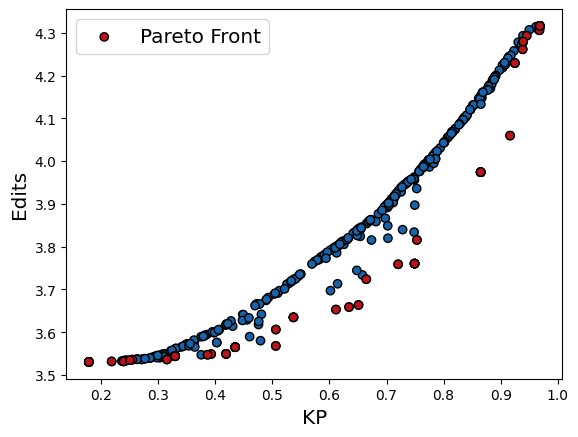

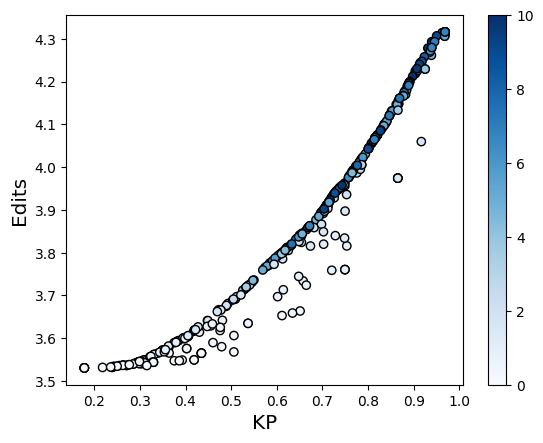

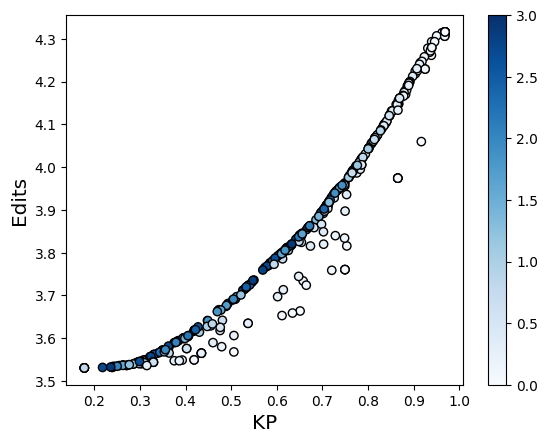

In [7]:
plot_study(study, "vgg", print_colorbar=False)
plot_study(study, "vgg_lambd2", print_pareto=False, map=lambda t: t.params["lambd2"])
plot_study(study, "vgg_max_dist", print_pareto=False, map=lambda t: t.params["max_dist"])

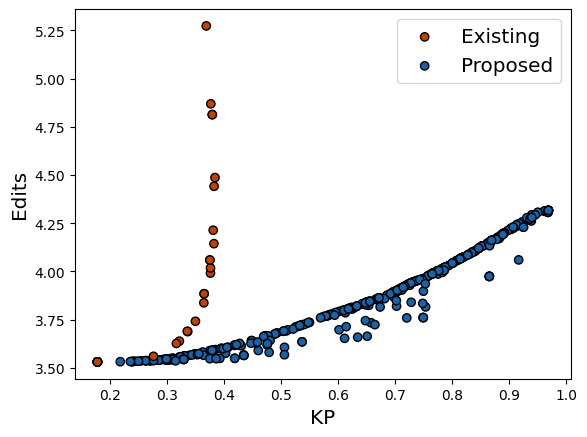

In [8]:
other_study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_vandenhende3")
plot_study(study, "vgg_compare_vandenhende", print_pareto=False, other_study=other_study, labels=["Proposed", "Existing"], print_colorbar=False, label_loc="best", switch_label=True)

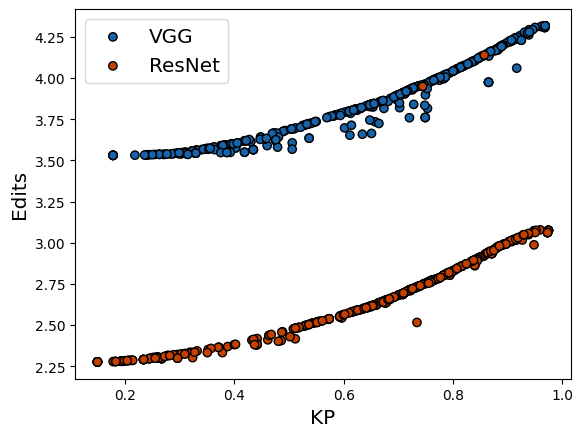

In [9]:
other_study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")
plot_study(study, "vgg_compare_resnet", print_pareto=False, other_study=other_study, labels=["VGG", "ResNet"], print_colorbar=False)

In [10]:
np.average([t.params["max_dist"] for t in study.best_trials])

0.383784542831845

In [11]:
best_trial = None
best_KP = 0
for t in study.best_trials:
    if t.values[0] > best_KP:
        best_trial = t
        best_KP = t.values[0]
best_trial

FrozenTrial(number=0, state=1, values=[0.9685366109885493, 4.3160281115393335], datetime_start=datetime.datetime(2023, 2, 7, 16, 41, 22, 949053), datetime_complete=datetime.datetime(2023, 2, 7, 18, 3, 17, 75860), params={'lambd2': 10.0, 'max_dist': 0.0}, user_attrs={}, system_attrs={'fixed_params': {'lambd2': 10, 'max_dist': 0}, 'nsga2:generation': 0}, intermediate_values={}, distributions={'lambd2': FloatDistribution(high=10.0, log=False, low=0.0, step=None), 'max_dist': FloatDistribution(high=3.0, log=False, low=0.0, step=None)}, trial_id=899, value=None)

In [12]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [13]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[0], target_name="KP")

In [14]:
optuna.visualization.plot_contour(study, params=["lambd2", "max_dist"], target=lambda t: t.values[1], target_name="edits")

In [15]:
hyperparams = ["lambd2", "max_dist"]

In [16]:
analyze_spearman(study, hyperparams, "vgg")

lambd2 correlation is: 0.7682707929031944 on KP, 0.8223198786730311 on edits.
lambd2 pvalue is: 1.0617260069714071e-79 on KP, 3.1071663991628765e-100 on edits.
max_dist correlation is: -0.56943225570079 on KP, -0.4775797174028604 on edits.
max_dist pvalue is: 5.1777682209516554e-36 on KP, 2.3738476571178457e-24 on edits.


In [17]:
analyze_pearson(study, hyperparams)

lambd2 correlation is: 0.771162314483026 on KP, 0.7977618086053805 on edits.
lambd2 pvalue is: 1.1838448746709293e-80 on KP, 3.953416949472967e-90 on edits.
max_dist correlation is: -0.5066975547387735 on KP, -0.49980018341809873 on edits.
max_dist pvalue is: 1.1369003421723145e-27 on KP, 7.431846532827802e-27 on edits.


In [18]:
results = combine_results("optimize_counterfactuals_vgg_distance_final")

In [19]:
evaluate_results_spearman(results, "vgg")

avg edits Spearman correlation is 1.00, -1.00, -0.99, -1.00, -0.99
eval single near Spearman correlation is -1.00, 1.00, 1.00, 1.00, 1.00
eval single same Spearman correlation is -0.99, 1.00, 1.00, 0.99, 1.00
eval all near Spearman correlation is -1.00, 1.00, 0.99, 1.00, 0.99
eval all same Spearman correlation is -0.99, 1.00, 1.00, 0.99, 1.00

avg edits Spearman pvalue is 0.000, 0.001, 0.001, 0.001, 0.001
eval single near Spearman pvalue is 0.001, 0.000, 0.001, 0.001, 0.001
eval single same Spearman pvalue is 0.001, 0.001, 0.000, 0.001, 0.001
eval all near Spearman pvalue is 0.001, 0.001, 0.001, 0.000, 0.001
eval all same Spearman pvalue is 0.001, 0.001, 0.001, 0.001, 0.000


In [20]:
evaluate_results_pearson(results)

avg_edits Pearson correlation is 0.9999999999999998, 0.9711519393685183, 0.9760616253739574, 0.9677989696652148, 0.9643443597126703
eval_single_near Pearson correlation is 0.9711519393685183, 1.0, 0.9949287943941286, 0.9978329749719541, 0.9945224640755068
eval_single_same Pearson correlation is 0.9760616253739574, 0.9949287943941286, 0.9999999999999999, 0.991704363490282, 0.996940905194078
eval_all_near Pearson correlation is 0.9677989696652148, 0.9978329749719541, 0.991704363490282, 0.9999999999999998, 0.9954162700929852
eval_all_same Pearson correlation is 0.9643443597126703, 0.9945224640755068, 0.996940905194078, 0.9954162700929852, 1.0

avg_edits Pearson pvalue is 0.0, 9.06792895480223e-252, 8.453619120383039e-268, 2.428084002467095e-242, 1.2812372603970025e-233
eval_single_near Pearson pvalue is 9.06792895480223e-252, 0.0, 0.0, 0.0, 0.0
eval_single_same Pearson pvalue is 8.453619120383039e-268, 0.0, 0.0, 0.0, 0.0
eval_all_near Pearson pvalue is 2.428084002467095e-242, 0.0, 0.0, 0.

In [21]:
evaluate_results_average(results)

avg_edits average is 3.860998305049467
eval_single_near average is 0.8937654735257506
eval_single_same average is 0.6446263092550599
eval_all_near average is 0.8706072433396176
eval_all_same average is 0.6382344545668719
